<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-модулей" data-toc-modified-id="Загрузка-модулей-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка модулей</a></span></li><li><span><a href="#Настройки" data-toc-modified-id="Настройки-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Настройки</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Вывод-этапа" data-toc-modified-id="Вывод-этапа-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Вывод этапа</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Изменение-данных" data-toc-modified-id="Изменение-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изменение данных</a></span></li><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Вывод-этапа" data-toc-modified-id="Вывод-этапа-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Вывод этапа</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Составление-матрицы-$P$,-проверка-на-обратимость-и-преобразование" data-toc-modified-id="Составление-матрицы-$P$,-проверка-на-обратимость-и-преобразование-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Составление матрицы $P$, проверка на обратимость и преобразование</a></span></li><li><span><a href="#Обучение-и-проверка-качества" data-toc-modified-id="Обучение-и-проверка-качества-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Обучение и проверка качества</a></span></li><li><span><a href="#Вывод-этапа" data-toc-modified-id="Вывод-этапа-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Вывод этапа</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

### Загрузка модулей

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### Настройки

In [2]:
RANDOM_STATE = 12345
state = np.random.RandomState(RANDOM_STATE)
# Цветовая палитра документа
cm = 'crest'
mec = 'gray'
alpha = 0.7
fontsize = 20
figsize_base = 5

def new_color(x='r'):
    '''Цвет графиков, по умолчанию случайный из заданной цветовой палитры. Принимает в качестве аргумента число, \
    соответствующее цвету в палитре.'''
    if x == 'r':
        return list(sns.color_palette(cm, 20)[random.randint(0,19)])
    return list(sns.color_palette(cm, 20)[x])
# Размеры

def figsize(width = 1, height=1):
    '''Задание размеров окна отрисовки.'''
    return (width*figsize_base, height*figsize_base)

# Отрисовка 
def plot_set(ax,title='',xlabel='',ylabel='',fontsize=fontsize,xrot=True,figsize=figsize()):
    '''Функция для отрисовки дополнительных параметров графиков. Подписьи осей и названия, размер шрифта и размер окна, 
    включение сетки.'''
    plt.xticks(rotation=90*int(xrot), fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.title(title+'\n', fontsize=fontsize)
    plt.xlabel('\n'+xlabel, fontsize=fontsize)
    plt.ylabel(ylabel+'\n', fontsize=fontsize)
    plt.grid(True)
    None
    
def mean_percent(x):
    '''Функция для форматирования значений. Округление до сотых и знак процента.'''
    try:
        return "{0:.2%}".format(x)
    except:
        return x

### Загрузка данных

In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
df.head(25)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [6]:
df.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [7]:
df.isna().mean().sort_values().apply(mean_percent)

Пол                  0.00%
Возраст              0.00%
Зарплата             0.00%
Члены семьи          0.00%
Страховые выплаты    0.00%
dtype: object

In [8]:
df.duplicated().sum()

153

### Вывод этапа

Изучен датафрейм `insurance.csv`:
- 5 столбцов:
    - `Пол`
    - `Возраст`
    - `Зарплата`
    - `Члены семьи`
    - `Страховые выплаты`
- 5 000 строк
- Пропусков нет 
- 153 дубликата
- Типы столбцов `Возраст` и `Зарплата`необходимо поменять на `int`.

## Предобработка данных

### Изменение данных

Удалим дубликаты

In [9]:
df = df.drop_duplicates()

Изменим типы данных

In [10]:
df = df.astype('int')

### Изучение данных

Рассмотрим распределение зарплат и возрастов.

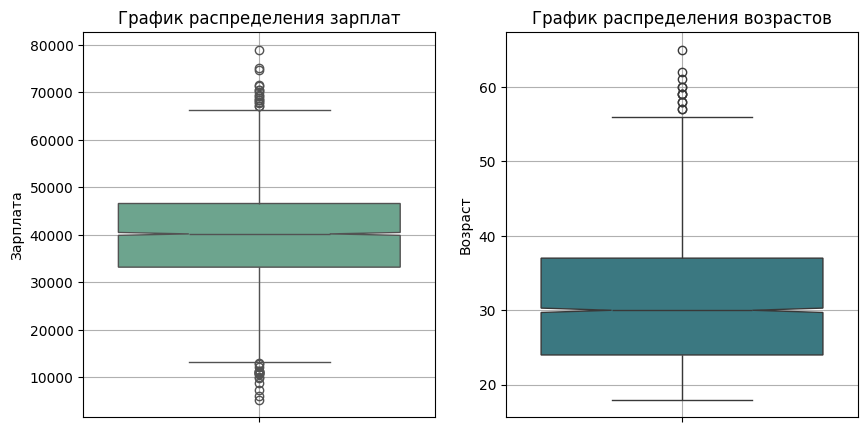

In [11]:
plt.figure(figsize=figsize(2))
plt.subplot(1,2,1)
sns.boxplot(df['Зарплата'],notch=True,color = new_color())
plt.title('График распределения зарплат')
plt.grid(True)
plt.subplot(1,2,2)
sns.boxplot(df['Возраст'],notch=True,color = new_color())
plt.title('График распределения возрастов')
plt.grid(True)
None

Наблюдаются выбросы в распределении зарплат: есть слишком малые и слишко высокие.
Наблюдаются выбросы в распределении возрастов: есть слишком возрастные.

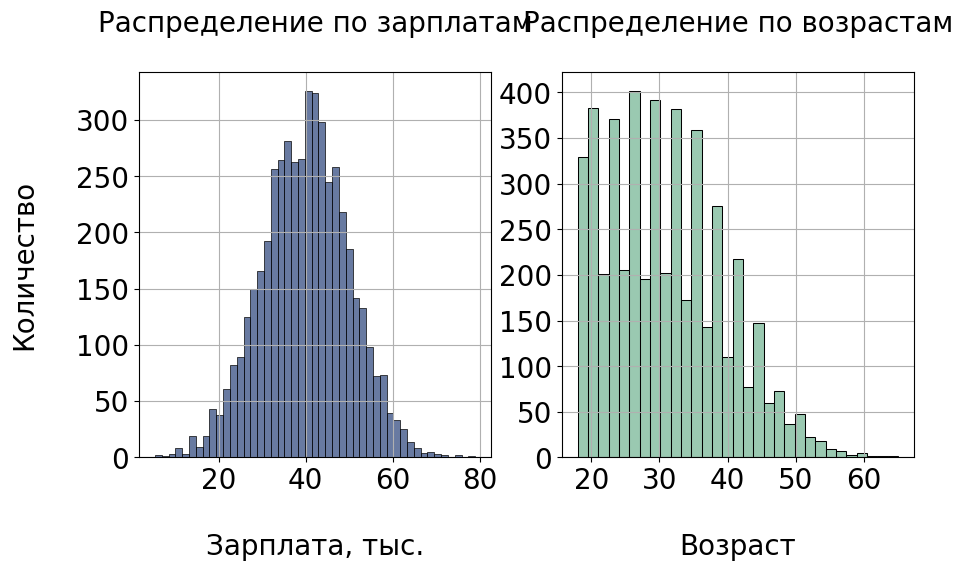

In [12]:
plt.figure(figsize=figsize(2))
plt.subplot(1,2,1)
ax = sns.histplot(df['Зарплата']/1000,color=new_color(),alpha=alpha)
plot_set(ax,title='Распределение по зарплатам', xlabel='Зарплата, тыс.',ylabel='Количество',xrot=False)
plt.subplot(1,2,2)
ax = sns.histplot(df['Возраст'],color=new_color(),alpha=alpha)
plot_set(ax,title='Распределение по возрастам', xlabel='Возраст',xrot=False)

Распределение по зарплатам близко к нормальному.
В распределении по возрастам наблюдается особенность: сильное различие между соседними значениями. Скорее всего связано с особенностями измерения или округления.

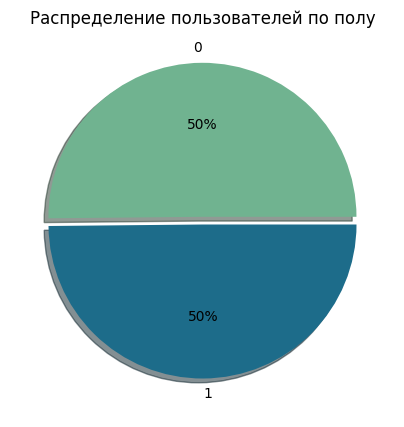

In [13]:
df['Пол'].value_counts().plot(
    kind = 'pie',
    autopct = '%1.0f%%',
    figsize=figsize(), 
    title = 'Распределение пользователей по полу',
    colors=[new_color(3),new_color(13)],explode = (0.05,0), shadow=True);
plt.ylabel('')
None

Оба пола представлены в равной мере.

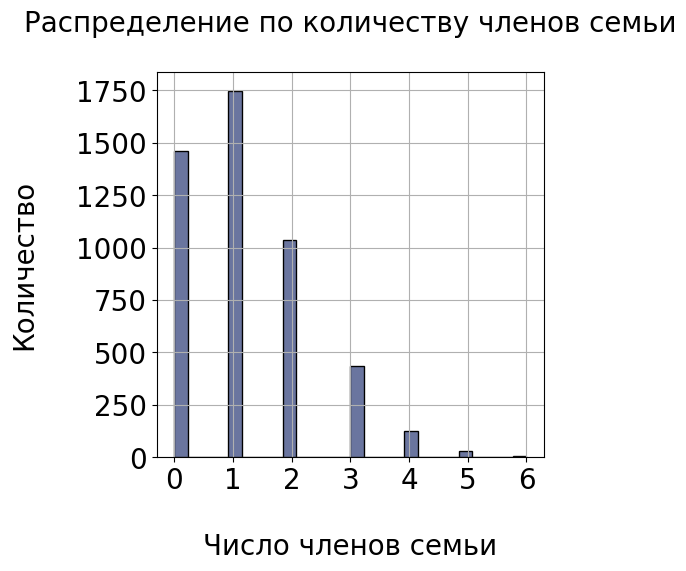

In [14]:
plt.figure(figsize=figsize())
ax = sns.histplot(df['Члены семьи'],color=new_color(),alpha=alpha)
plot_set(ax,title='Распределение по количеству членов семьи', xlabel='Число членов семьи',ylabel='Количество',xrot=False)

Распределение количества членов семьи (судя по всему без учёта самого клиента) говорит о том что большенство клиентов либо с 1-2 членами семьи, либо одиноки. 3-6 встречаются редко, более - не представлены. 

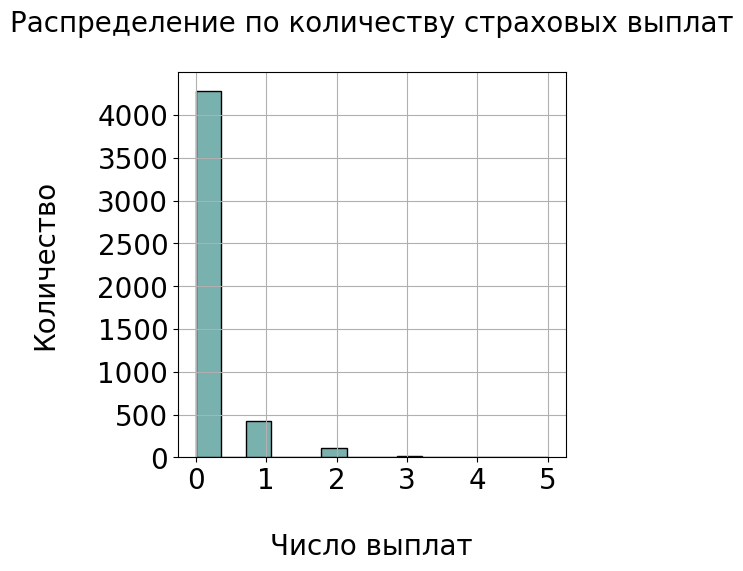

In [15]:
plt.figure(figsize=figsize())
ax = sns.histplot(df['Страховые выплаты'],color=new_color(),alpha=alpha)
plot_set(ax,title='Распределение по количеству страховых выплат', xlabel='Число выплат',ylabel='Количество',xrot=False)

Большиноство клиентов не получало страховые выплаты. 

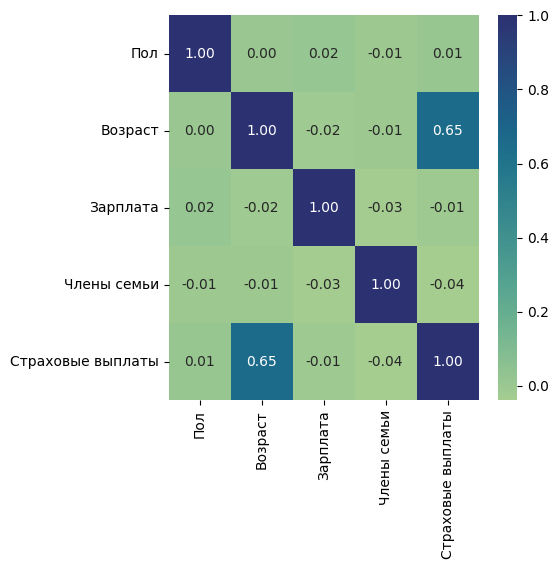

In [16]:
plt.figure(figsize=figsize())
sns.heatmap(df.corr(), annot=True, cmap=cm, fmt='.2f')
None

Наблюдаются корреляция страховых выплат только с возрастом.

### Вывод этапа

- Проведена предобработка данных:
    - Удалены дубликаты
    - Изменены типы данных
- Исследованы данные:
    - Наблюдаются выбросы в распределении зарплат: есть слишком малые и слишко высокие. 
    - Наблюдаются выбросы в распределении возрастов: есть слишком возрастные.
    - Распределение по зарплатам близко к нормальному. 
    - В распределении по возрастам наблюдается особенность: сильное различие между соседними значениями. Скорее всего связано с особенностями измерения или округления.
    - Распределение количества членов семьи (судя по всему без учёта самого клиента) говорит о том что большенство клиентов либо с 1-2 членами семьи, либо одиноки. 3-6 встречаются редко, более - не представлены.
    - Оба пола представлены в равной мере
    - Большиноство клиентов не получало страховые выплаты. 
    - Наблюдаются корреляция страховых выплат только с возрастом.

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w \text{MSE}(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Вопрос:** Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?

**Ответ:** Не изменится

**Обоснование:** 

Пусть $X' = X P$ - преобразованная матрица признаков. Тогда новое предсказание 

$$a' = X' w',$$ 

где $w'$ новый вектор весов линейной регрессии. $w'$ можно найти как:

$$
w' = (X'^T X')^{-1} X'^T y = ((XP)^T XP)^{-1} (XP)^T y 
$$

Воспользуемся свойством
$$
(XP)^T= P^T X^T.
$$
 
Тогда:
$$
w' = (P^T X^T X P)^{-1} P^T X^T y 
$$

Далее воспользуемся тем, что для квадратных матриц $(A B)^{-1} = B^{-1} A^{-1}$. Тогда:

$$
w' = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y. 
$$

Так как $(P^T)^{-1} P^T = \hat{1}$ - единичная матрица.

$$
w' = P^{-1} (X^T X)^{-1} X^T y. 
$$

Вспомнив, что
$$
w = (X^T X)^{-1} X^T y. 
$$

Сравнивая $w$ и $w'$.

$$
w' = P^{-1} w
$$

Вернёмся к  $a' = X' w'$:

$$
a' = XPP^{-1} (X^T X)^{-1} X^T y = X (X^T X)^{-1} X^T y
$$

В то же время, для непреобразованных $a$:

$$
a = Xw = X (X^T X)^{-1} X^T y
$$

Сравнивая $a$ и $a'$:

$$
a = a'
$$

Таким образом, предсказания модели не меняются, соответственно и качество линейной регрессии не изменяется.

Связь параметров линейной регрессии в преобразованной и в исходной задаче:

$$
w' = P^{-1} w
$$

## Алгоритм преобразования

**Алгоритм**

Для защиты информации на этапе поиска коэффициентов регрессии и предсказаний регрессии будем умножать матрицу признаков на обратимую матрицу $P$
, которая будет генерироваться случайным образом.

Этапы алгоритма:

- Составление матрицы $P$.

- Проверка матрицы на обратимость. Вычисление детерминанта матрицы $ P $. В случае нулевого детерминанта генерировать матрицы, пока определитель будет ненулевым.

- Получение матрицы преобразованных признаков $X'=XP$.

- Обучение модели на преобразованных признаках $X'$.

**Обоснование**

- Матрица $P$ должна иметь размерность $n \times n $, где $n$ - количество признаков для регрессии. 

- Матрица $P$ должна быть обратимой. Обратная матрица $P^{-1}$ существует только для невырожденных матриц ($\det{P}\ne0$).

- В результате умножения матрицы $X$ на квадратную матрицу $P$ получится матрица $X'$ той же размерности, что и исходная $X$ 

- В результате обучения модели на новых признаках, качество предсказаний не изменится. Это было доказано выше.

## Проверка алгоритма

### Подготовка данных

Выделим целевой признак:

In [17]:
features = df.drop('Страховые выплаты',axis=1)
target = df['Страховые выплаты']

Разделим выбоку на обучающую и тестовую:

In [18]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=RANDOM_STATE)

### Составление матрицы $P$, проверка на обратимость и преобразование

Составим случайную квадратную матрицу $P$ размерности числа признаков. Матрица заполнена случайными числами, выбранными из одномерного нормального распределения со средним значением 0 и дисперсией 1.

In [19]:
P = np.random.randn(features_train.shape[1],features_train.shape[1])

Проверим матрицу на вырожденность:

In [20]:
while np.linalg.det(P) == 0:
    P = np.random.randn(features_train.shape[1],features_train.shape[1])
    print('\nМатрица вырождена, новая генерация')
print('\nМатрица не вырождена')
    


Матрица не вырождена


Преобразуем матрицу признаков путём умножения на матрицу $P$:

In [21]:
features_train_encrypted = features_train @ P
features_test_encrypted = features_test @ P

### Обучение и проверка качества

Обучим модель на исходных признаках:

In [22]:
model = LinearRegression()
model.fit(features_train, target_train)
predict_test = model.predict(features_test)

Получим вектор коэффициентов:

In [23]:
model.intercept_

-0.9767095463754674

In [24]:
w = model.coef_
w

array([ 1.45766006e-02,  3.64782925e-02,  1.79476487e-07, -1.23345017e-02])

Оценим качество исходной модели:

In [25]:
R2 = r2_score(target_test, predict_test)
R2

0.4230772761583639

Обучим модель на преобразованных признаках:

In [26]:
model_encrypted = LinearRegression()
model_encrypted.fit(features_train_encrypted, target_train)
predict_test_encrypted = model_encrypted.predict(features_test_encrypted)

Получм новый вектор коэффициентов:

In [27]:
model_encrypted.intercept_

-0.9767095463774462

In [28]:
w_encrypted = model_encrypted.coef_
w_encrypted

array([ 0.0236586 , -0.00880276, -0.00359845, -0.0293828 ])

Оценим качество новой модели:

In [29]:
R2_encrypted = r2_score(target_test, predict_test_encrypted)
R2_encrypted

0.42307727615860913

Сравним коэффициенты новой модели и преобразованные коэффициенты старой модели:

In [30]:
w_encrypted - np.linalg.inv(P) @ w

array([-2.60803878e-12,  3.67646885e-12,  7.27805316e-12,  1.17535738e-11])

Совпадают с точностью до 14 знака - в пределах машинной точности.

Сравним качество моделей:

In [31]:
if np.abs(R2 - R2_encrypted) < 1e10:
    print('Качество линейной регрессии не меняется')
else:
    print('Качество линейной регрессии меняется')

Качество линейной регрессии не меняется


Зашифрованные данные позволяют получить то же качество обучения, что и исходные данные.

Дешифровка данных

In [32]:
(features_train_encrypted @ np.linalg.inv(P)).astype('int')

,0,1,2,3
4599,0,27,54499,1
3882,1,37,50699,0
4705,0,23,28000,0
1400,0,46,38799,0
728,0,39,32499,0
...,...,...,...,...
3592,0,22,28199,0
3586,0,29,33699,0
2211,0,19,28899,0
3653,0,33,38799,0


In [33]:
(features_test_encrypted @ np.linalg.inv(P)).astype('int')

,0,1,2,3
1335,0,23,47199,0
3875,0,32,65899,0
166,0,32,33899,1
3003,0,38,19299,2
424,0,45,27500,1
...,...,...,...,...
1589,0,34,22999,0
32,0,29,50999,1
360,0,25,33499,2
2862,0,25,33099,0


### Вывод этапа

- Выделен целевой признак ` Страховые выплаты`.
- Выборка разделена на обучающую (`75%`) и тестовую (`25%`).
- Составлена случайная квадратная матрица $P$ размерности числа признаков. Матрица заполнена случайными числами, выбранными из одномерного нормального распределения со средним значением 0 и дисперсией 1.
- Матрица проверена на вырожденность.
- Проведено обучение модели `LinearRegression` на исходных и преобразованных признаках
    - Качество линейной регрессии не меняется
    - Коэффициенты новой модели и преобразованные коэффициенты старой модели совпадают с точностью до 14 знака - в пределах машинной точности.
    - Зашифрованные данные позволяют получить то же качество обучения, что и исходные данные.

## Общий вывод

- Изучен датафрейм `insurance.csv`:
    - 5 столбцов:
        - `Пол`
        - `Возраст`
        - `Зарплата`
        - `Члены семьи`
        - `Страховые выплаты`
    - 5 000 строк
    - Пропусков нет 
    - 153 дубликата
    - Типы столбцов `Возраст` и `Зарплата`необходимо поменять на `int`.
- Проведена предобработка данных:
    - Удалены дубликаты
    - Изменены типы данных
- Исследованы данные:
    - Наблюдаются выбросы в распределении зарплат: есть слишком малые и слишко высокие. 
    - Наблюдаются выбросы в распределении возрастов: есть слишком возрастные.
    - Распределение по зарплатам близко к нормальному. 
    - В распределении по возрастам наблюдается особенность: сильное различие между соседними значениями. Скорее всего связано с особенностями измерения или округления.
    - Распределение количества членов семьи (судя по всему без учёта самого клиента) говорит о том что большенство клиентов либо с 1-2 членами семьи, либо одиноки. 3-6 встречаются редко, более - не представлены.
    - Оба пола представлены в равной мере
    - Большиноство клиентов не получало страховые выплаты. 
    - Наблюдаются корреляция страховых выплат только с возрастом.
    
- Теоретически обосновано что при умножении признаков на обратимую матрицу качество линейной регрессии не изменяется.
- Теория проверена на практике: 
    - Выделен целевой признак ` Страховые выплаты`.
    - Выборка разделена на обучающую (`75%`) и тестовую (`25%`).
    - Составлена случайная квадратная матрица $P$ размерности числа признаков. Матрица заполнена случайными числами, выбранными из одномерного нормального распределения со средним значением 0 и дисперсией 1.
    - Матрица проверена на вырожденность.
    - Проведено обучение модели `LinearRegression` на исходных и преобразованных признаках
        - Качество линейной регрессии не меняется
        - Коэффициенты новой модели и преобразованные коэффициенты старой модели совпадают с точностью до 14 знака - в пределах машинной точности.
- Зашифрованные данные позволяют получить то же качество обучения, что и исходные данные.        